___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc
#from scikit_plot.metrics import plot_roc, plot_precision_recall
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_halving_search_cv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from sklearn.model_selection import HalvingGridSearchCV

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Data Wrangling

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/data/Womens Clothing E-Commerce Reviews.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
df.shape

(23486, 11)

In [9]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df = df.dropna(axis=0,  how = 'all', subset=['Review Text'])

In [12]:
df['Title'] = df['Title'].fillna('')

In [13]:
df.isnull().sum()

Unnamed: 0                  0
Clothing ID                 0
Age                         0
Title                       0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [14]:
df['Recommended IND'].value_counts()

1    18540
0     4101
Name: Recommended IND, dtype: int64

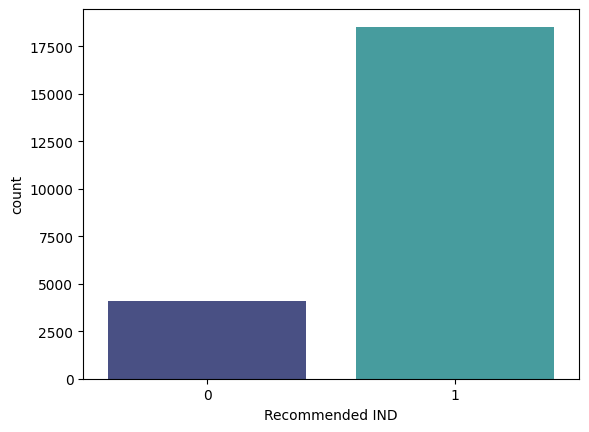

In [15]:
ax= sns.countplot(data=df, x='Recommended IND' , palette=("mako"))


<Axes: xlabel='Positive Feedback Count', ylabel='Count'>

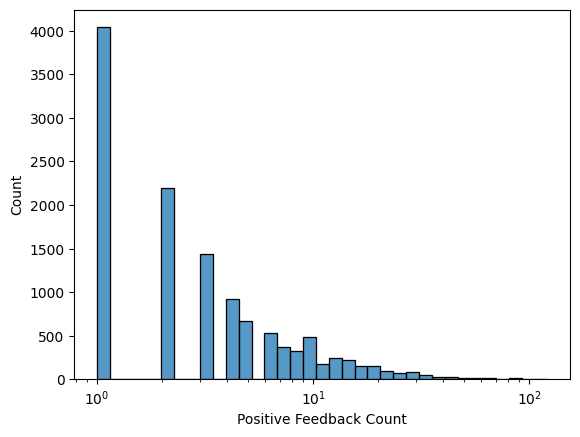

In [16]:
sns.histplot(data=df[df['Positive Feedback Count'] > 0], x='Positive Feedback Count', log_scale=True)

<Axes: xlabel='Rating', ylabel='count'>

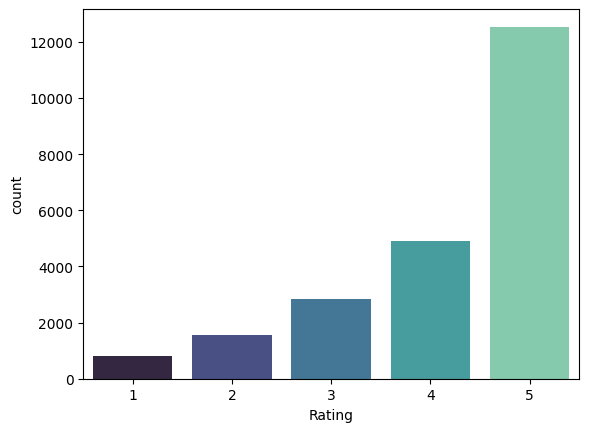

In [17]:
sns.countplot(data=df, x='Rating', palette='mako')

<Axes: xlabel='Class Name', ylabel='count'>

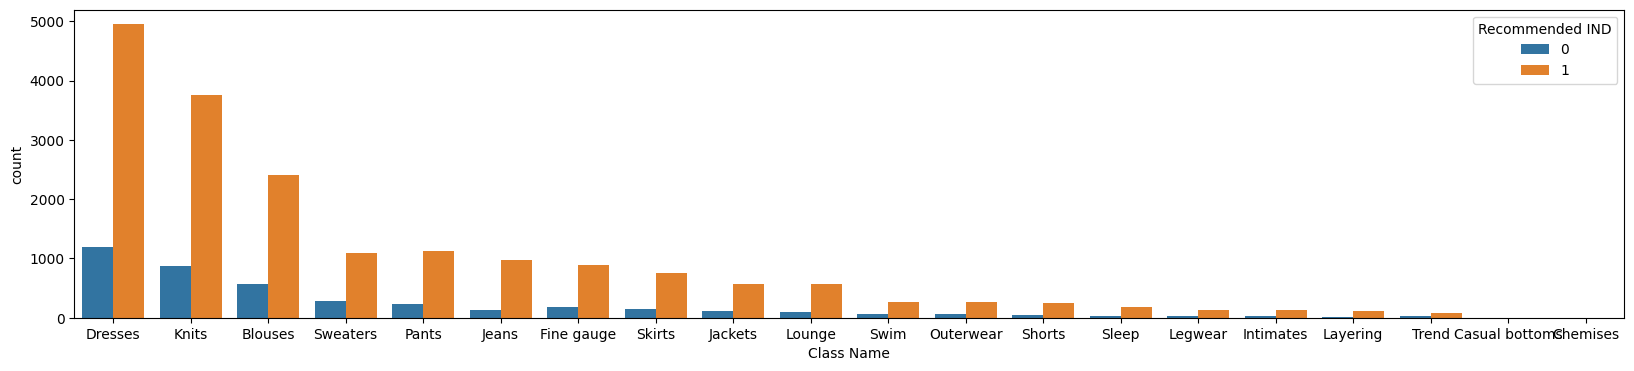

In [18]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df, x='Class Name', order=df['Class Name'].value_counts().sort_values(ascending=False).index, hue='Recommended IND')

<Axes: xlabel='Age', ylabel='Count'>

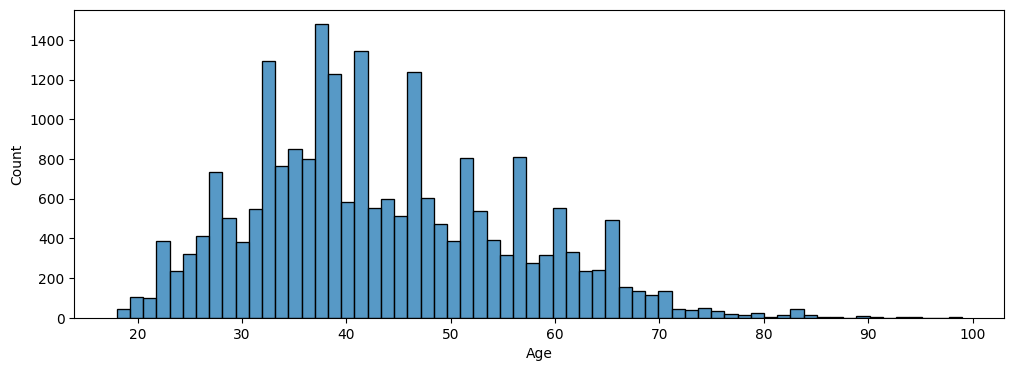

In [19]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df, x='Age')

In [20]:
df['review_text_len'] = df['Review Text'].apply(lambda text: len(text.split(' ')))

In [21]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_text_len
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,67
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [22]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"},
          inplace=True)

In [23]:
new_df = df[['text','label']]
new_df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Missing Value Detection

In [24]:
new_df.isnull().sum()

text     0
label    0
dtype: int64

In [25]:
new_df.duplicated().sum()

7

In [26]:
new_df.drop_duplicates(inplace=True)

<ipython-input-26-3af26efaede6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop_duplicates(inplace=True)


In [27]:
new_df.duplicated().sum()

0

In [28]:
new_df['label'].value_counts()

1    18534
0     4100
Name: label, dtype: int64

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [29]:
stop_words = stopwords.words("english")
for i in ["not", "no"]:
        stop_words.remove(i)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [31]:
positive_sentences = new_df[new_df["label"] == 1]["text"]
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
23479    wasnt sure ordering skirt couldnt see person f...
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 18534, dtype: object

In [32]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper wouldnt...
25       loved material didnt really look long dress pu...
                               ...                        
23449    tried color really pretty fun donset want pair...
23450    wanted love jacket soft great color unfortunat...
23460    purchased good price typically love maeve fabr...
23478    surprised positive review product terrible cut...
23483    fit well top see never would worked im glad ab...
Name: text, Length: 4101, dtype: object

In [33]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [34]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

---
---


In [35]:
from wordcloud import WordCloud
wordcloud_positive = WordCloud(background_color="black",
                               max_words =250,
                               scale=3)

In [36]:
wordcloud_positive.generate(positive_words)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

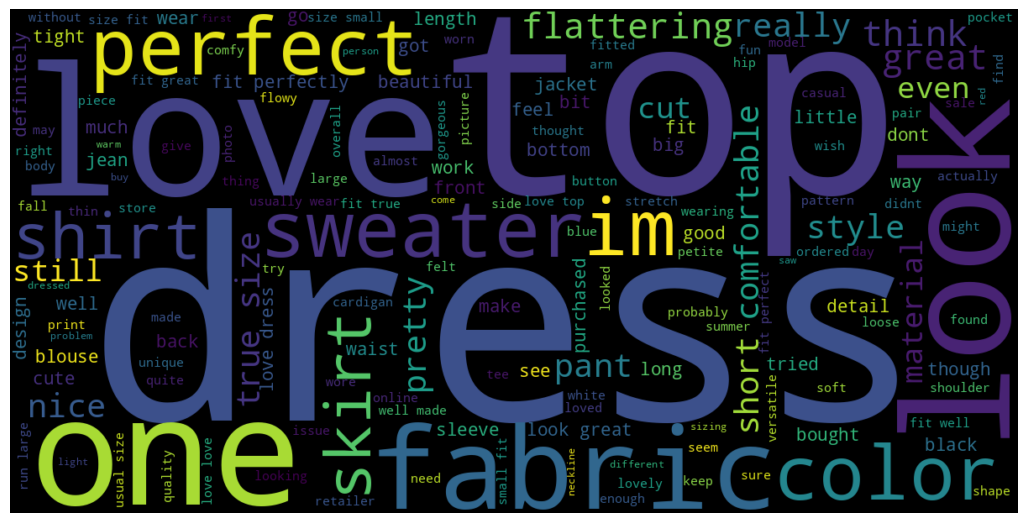

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive,
           interpolation="bilinear")
plt.axis("off")
plt.show()

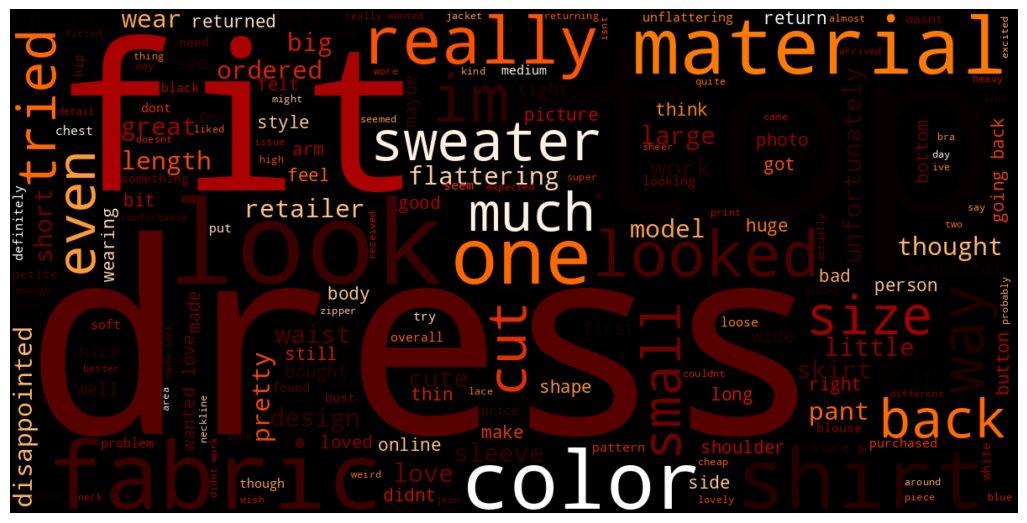

In [38]:
wordcloud_negative = WordCloud(background_color="black",
                               max_words=250,
                               colormap='gist_heat',
                               scale=3)

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative,
           interpolation="bilinear")
plt.axis("off")
plt.show()

---
---


## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [39]:
X = new_df['text']
y = new_df["label"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train,
                                                     test_size=0.1, stratify=y_train, random_state=42)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [41]:
vectorizer = CountVectorizer(preprocessor=cleaning,
                             min_df=3,
                             max_df=0.90)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [42]:
df_train_count_vic = pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out(),
                              index= X_train.index)
df_test_count_vic = pd.DataFrame(X_test_count.toarray(), columns = vectorizer.get_feature_names_out(),
                              index= X_test.index)

In [43]:
df_train_count_vic[:1]

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
7619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_test_count_vic[:1]

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [45]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [46]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(),
                              index= X_train.index)
df_test_tfidf = pd.DataFrame(X_test_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(),
                              index= X_test.index)

In [47]:
df_train_tfidf[:1]

,00,000,00p,02,03,03dd,04,06,0dd,0in,...,zippered,zippers,zippie,zipping,zips,zombie,zone,zoolander,zoom,ã¼ber
7619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df_test_tfidf[:1]

,00,000,00p,02,03,03dd,04,06,0dd,0in,...,zippered,zippers,zippie,zipping,zips,zombie,zone,zoolander,zoom,ã¼ber
256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [49]:
#confusion matrix
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("\tTest_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(6, 6))
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print(classification_report(y_test, y_pred))
    print()
    print("\tTrain_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_train_pred), show_normed = True, figsize=(6, 6))
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print()
    print(classification_report(y_train, y_train_pred))

In [50]:
#roc curve
def roc_auc_plot(model, y_train, X_train, y_test, X_test):
    pred_train = model.predict(X_train).ravel()
    pred_test = model.predict(X_test).ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [51]:
def eval_scores(model, X_train, y_train):
    scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None, labels=[0]),
            'recall': make_scorer(recall_score, average=None, labels = [0]),
            'f1': make_scorer(f1_score, average=None, labels = [0])}
                                                                                # 5 -> stratification
    scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
    df_scores = pd.DataFrame(scores, index = range(1,6))
    return df_scores


## Logistic Regression

### CountVectorizer

In [52]:
logisitc_model = LogisticRegression(C=0.01,
                         max_iter=1000,
                         class_weight= "balanced",
                         random_state=42)
logisitc_model.fit(X_train_count, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [53]:
logistic_scores = eval_scores(logisitc_model, X_train_count, y_train)
logistic_scores.mean()[2:]

test_accuracy      0.846294
train_accuracy     0.860322
test_precision     0.549220
train_precision    0.574320
test_recall        0.846341
train_recall       0.884553
test_f1            0.666105
train_f1           0.696449
dtype: float64

	Test_Set



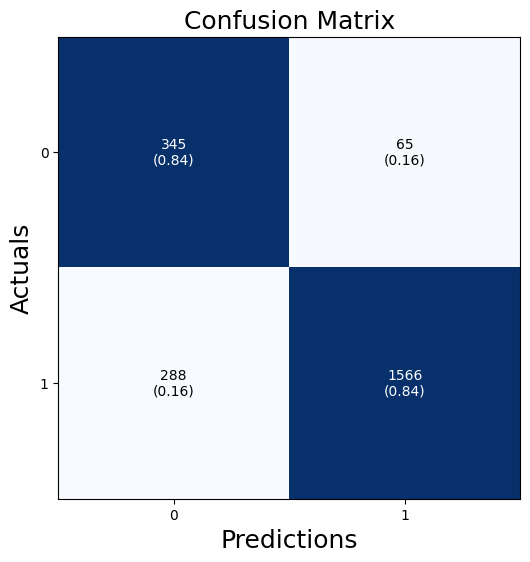

              precision    recall  f1-score   support

           0       0.55      0.84      0.66       410
           1       0.96      0.84      0.90      1854

    accuracy                           0.84      2264
   macro avg       0.75      0.84      0.78      2264
weighted avg       0.88      0.84      0.86      2264


	Train_Set



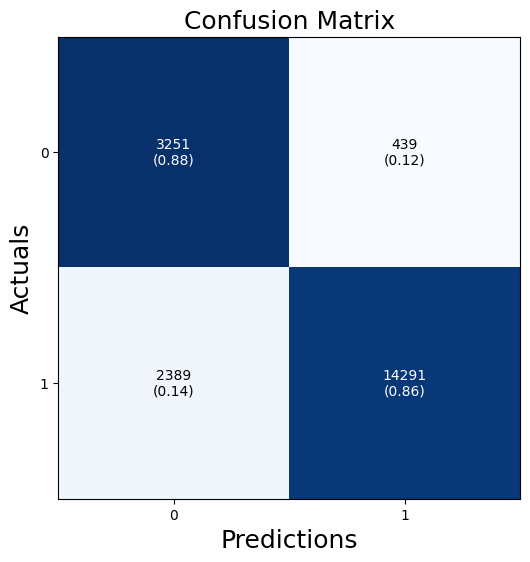


              precision    recall  f1-score   support

           0       0.58      0.88      0.70      3690
           1       0.97      0.86      0.91     16680

    accuracy                           0.86     20370
   macro avg       0.77      0.87      0.80     20370
weighted avg       0.90      0.86      0.87     20370



In [54]:
eval_metric(logisitc_model, X_train_count, y_train, X_test_count, y_test)

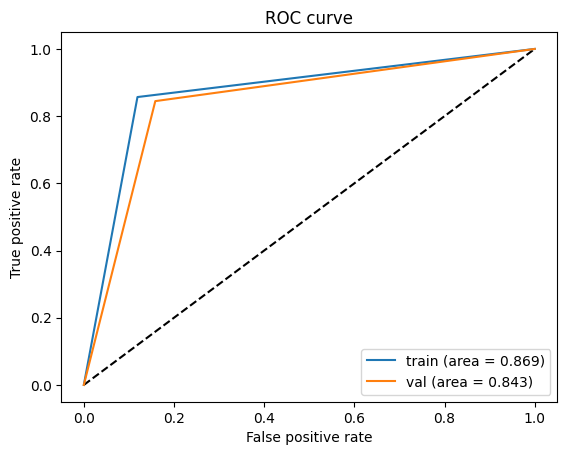

In [55]:
roc_auc_plot(logisitc_model, y_train, X_train_count, y_test, X_test_count)

In [56]:
y_pred = logisitc_model.predict(X_test_count)
y_pred_proba= logisitc_model.predict_proba(X_test_count)[:,1]

logisitc_count_AP = average_precision_score(y_test, y_pred_proba)
logisitc_count_rec = recall_score(y_test, y_pred)
logisitc_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [57]:
logisitc_model_tf = LogisticRegression(C=1,
                         max_iter=1000,
                         random_state=42,
                         class_weight="balanced")
logisitc_model_tf.fit(X_train_tf_idf, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=42)

In [58]:
logistic_scores_tf_idf = eval_scores(logisitc_model_tf, X_train_tf_idf, y_train)
logistic_scores_tf_idf.mean()[2:]

test_accuracy      0.873883
train_accuracy     0.901510
test_precision     0.607380
train_precision    0.660049
test_recall        0.861247
train_recall       0.940921
test_f1            0.712217
train_f1           0.775846
dtype: float64

	Test_Set



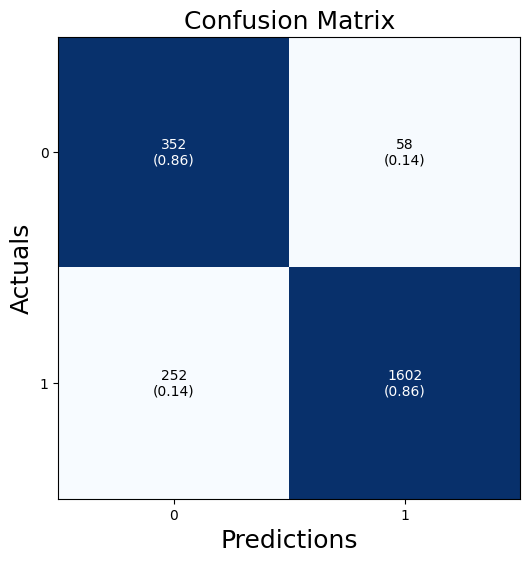

              precision    recall  f1-score   support

           0       0.58      0.86      0.69       410
           1       0.97      0.86      0.91      1854

    accuracy                           0.86      2264
   macro avg       0.77      0.86      0.80      2264
weighted avg       0.90      0.86      0.87      2264


	Train_Set



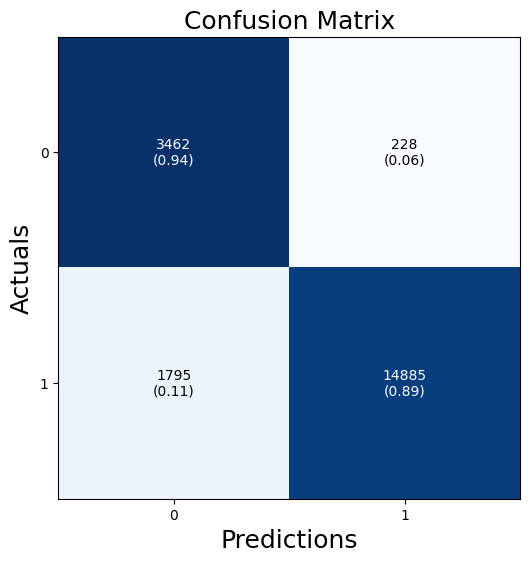


              precision    recall  f1-score   support

           0       0.66      0.94      0.77      3690
           1       0.98      0.89      0.94     16680

    accuracy                           0.90     20370
   macro avg       0.82      0.92      0.86     20370
weighted avg       0.93      0.90      0.91     20370



In [59]:
eval_metric(logisitc_model_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

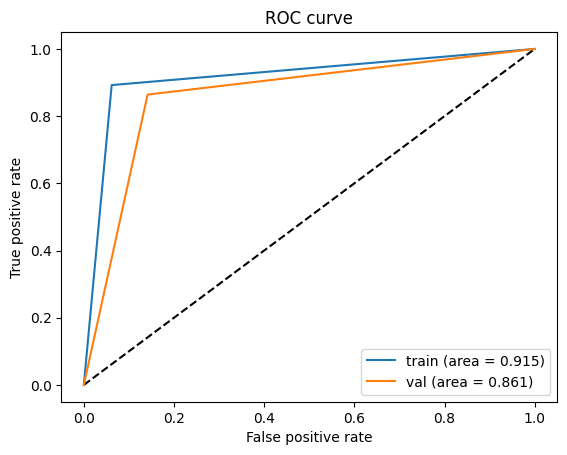

In [60]:
roc_auc_plot(logisitc_model_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [61]:
y_pred = logisitc_model_tf.predict(X_test_tf_idf)
y_pred_proba= logisitc_model_tf.predict_proba(X_test_tf_idf)[:,1]


logisitc_tfidf_AP = average_precision_score(y_test, y_pred_proba)
logisitc_tfidf_rec = recall_score(y_test, y_pred)
logisitc_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [62]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb_count = MultinomialNB(alpha=1.5)


In [63]:
nb_count.fit(X_train_count, y_train)

MultinomialNB(alpha=1.5)

In [64]:
nb_scores = eval_scores(nb_count, X_train_count, y_train)
nb_scores.mean()[2:]

test_accuracy      0.882769
train_accuracy     0.905179
test_precision     0.656411
train_precision    0.711168
test_recall        0.741463
train_recall       0.802507
test_f1            0.696194
train_f1           0.754077
dtype: float64

	Test_Set



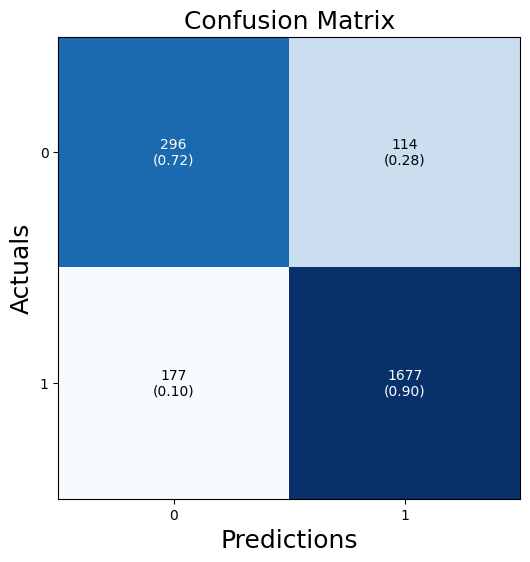

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       410
           1       0.94      0.90      0.92      1854

    accuracy                           0.87      2264
   macro avg       0.78      0.81      0.80      2264
weighted avg       0.88      0.87      0.87      2264


	Train_Set



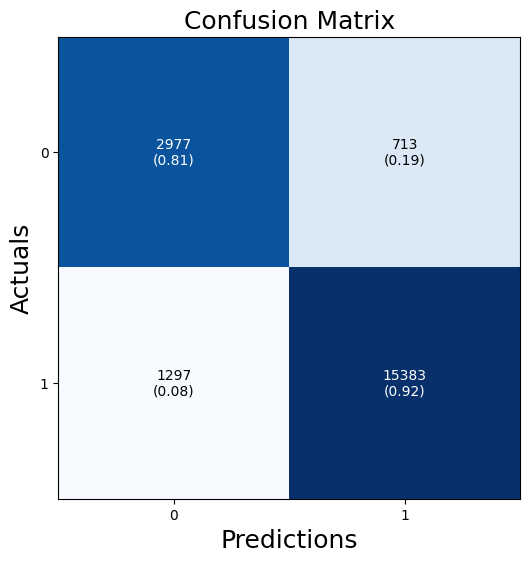


              precision    recall  f1-score   support

           0       0.70      0.81      0.75      3690
           1       0.96      0.92      0.94     16680

    accuracy                           0.90     20370
   macro avg       0.83      0.86      0.84     20370
weighted avg       0.91      0.90      0.90     20370



In [65]:
eval_metric(nb_count, X_train_count, y_train, X_test_count, y_test)

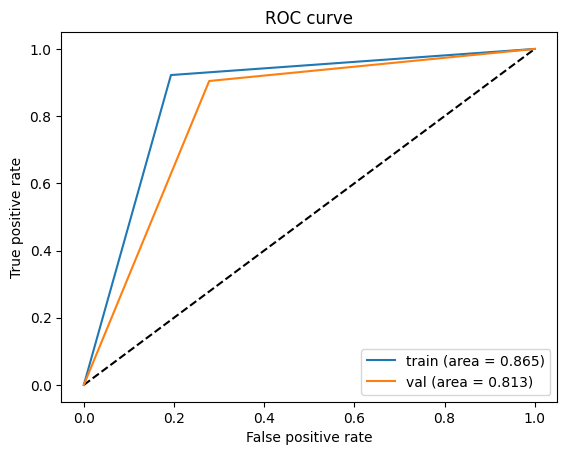

In [66]:
roc_auc_plot(nb_count, y_train, X_train_count, y_test, X_test_count)

In [67]:
y_pred = nb_count.predict(X_test_count)
y_pred_proba= nb_count.predict_proba(X_test_count)[:,1]

nb_count_AP = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [68]:
nb_tf_idf = BernoulliNB()
nb_tf_idf.fit(X_train_tf_idf, y_train)

BernoulliNB()

In [69]:
nb_scores_tf = eval_scores(nb_tf_idf.fit(X_train_tf_idf, y_train)
, X_train_tf_idf, y_train)
nb_scores_tf.mean()[2:]

test_accuracy      0.871429
train_accuracy     0.900761
test_precision     0.644853
train_precision    0.726676
test_recall        0.647154
train_recall       0.724797
test_f1            0.645819
train_f1           0.725733
dtype: float64

	Test_Set



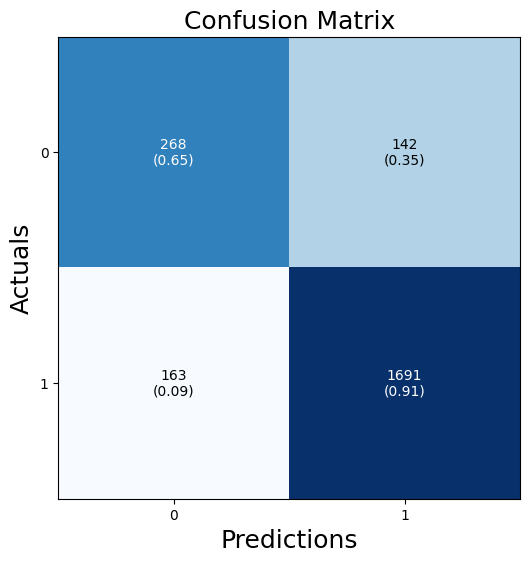

              precision    recall  f1-score   support

           0       0.62      0.65      0.64       410
           1       0.92      0.91      0.92      1854

    accuracy                           0.87      2264
   macro avg       0.77      0.78      0.78      2264
weighted avg       0.87      0.87      0.87      2264


	Train_Set



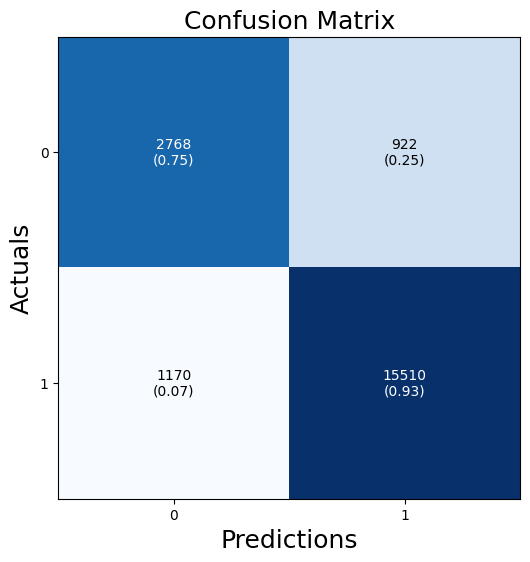


              precision    recall  f1-score   support

           0       0.70      0.75      0.73      3690
           1       0.94      0.93      0.94     16680

    accuracy                           0.90     20370
   macro avg       0.82      0.84      0.83     20370
weighted avg       0.90      0.90      0.90     20370



In [70]:
eval_metric(nb_tf_idf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

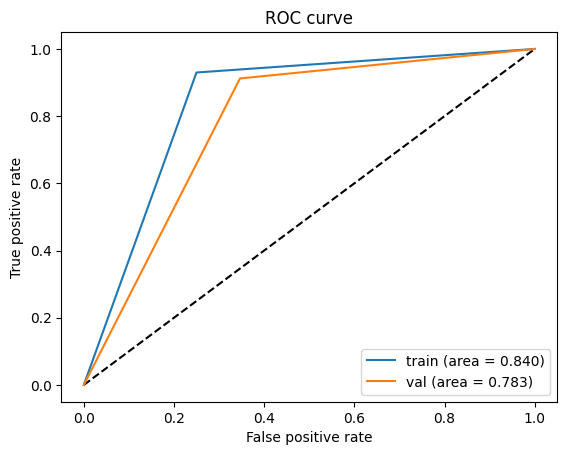

In [71]:
roc_auc_plot(nb_tf_idf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [72]:
y_pred = nb_tf_idf.predict(X_test_tf_idf)
y_pred_proba= nb_tf_idf.predict_proba(X_test_tf_idf)[:,1]


nb_tfidf_AP = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [73]:
#increasing the max_iter to help the model converge

svm = SVC(class_weight="balanced",
                random_state=42)
svm.fit(X_train_count, y_train)

SVC(class_weight='balanced', random_state=42)

In [74]:
svm_scores = eval_scores(svm, X_train_count, y_train)
svm_scores.mean()[2:]

test_accuracy      0.885960
train_accuracy     0.962543
test_precision     0.667550
train_precision    0.835295
test_recall        0.738482
train_recall       0.988076
test_f1            0.701184
train_f1           0.905280
dtype: float64

	Test_Set



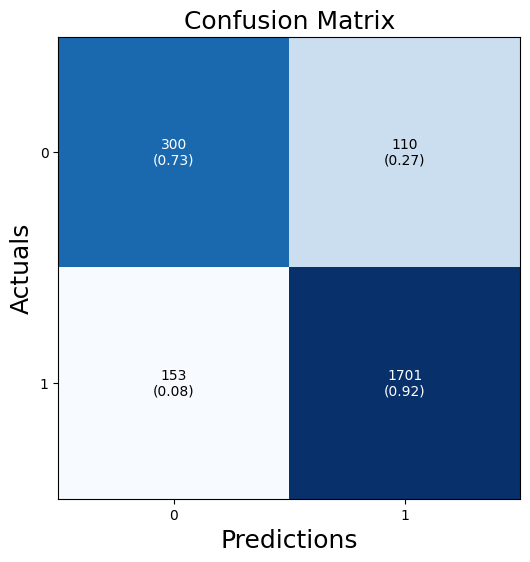

              precision    recall  f1-score   support

           0       0.66      0.73      0.70       410
           1       0.94      0.92      0.93      1854

    accuracy                           0.88      2264
   macro avg       0.80      0.82      0.81      2264
weighted avg       0.89      0.88      0.89      2264


	Train_Set



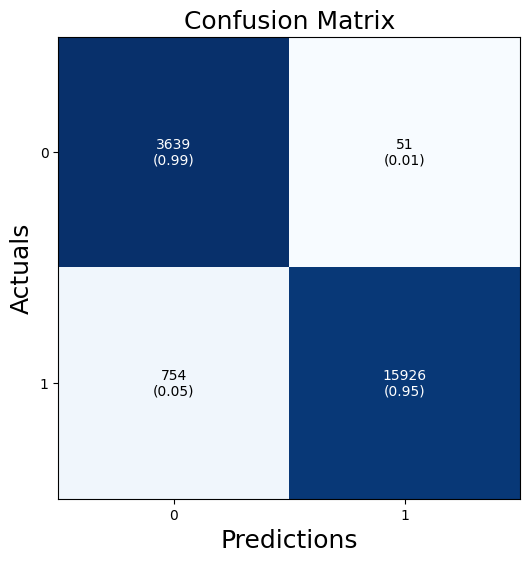


              precision    recall  f1-score   support

           0       0.83      0.99      0.90      3690
           1       1.00      0.95      0.98     16680

    accuracy                           0.96     20370
   macro avg       0.91      0.97      0.94     20370
weighted avg       0.97      0.96      0.96     20370



In [75]:
eval_metric(svm, X_train_count, y_train, X_test_count, y_test)

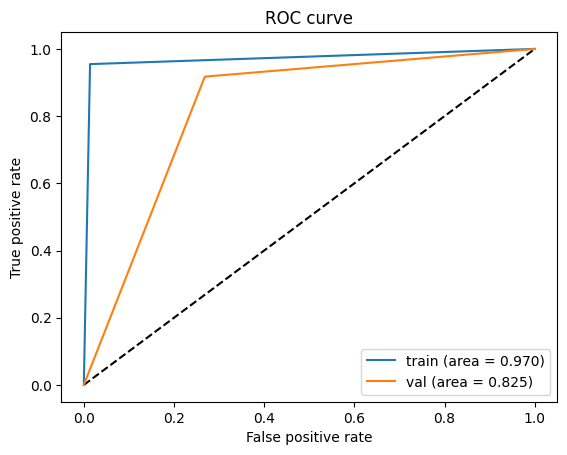

In [76]:
roc_auc_plot(svm, y_train, X_train_count, y_test, X_test_count)

In [77]:
y_pred = svm.predict(X_test_count)
decision_function= svm.decision_function(X_test_count)

svc_count_AP = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [78]:
svm_tf = SVC(class_weight="balanced",
                random_state=42)
svm_tf.fit(X_train_tf_idf, y_train)

SVC(class_weight='balanced', random_state=42)

In [79]:
svm_scores_tf = eval_scores(svm_tf, X_train_tf_idf, y_train)
svm_scores_tf.mean()[2:]

test_accuracy      0.894453
train_accuracy     0.975356
test_precision     0.693180
train_precision    0.880719
test_recall        0.749322
train_recall       0.999322
test_f1            0.719964
train_f1           0.936275
dtype: float64

	Test_Set



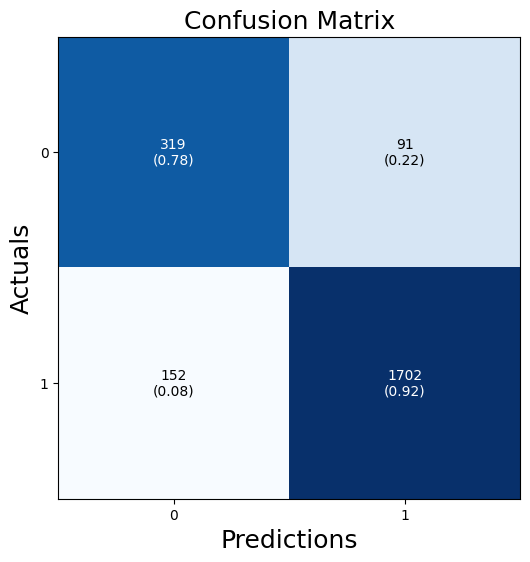

              precision    recall  f1-score   support

           0       0.68      0.78      0.72       410
           1       0.95      0.92      0.93      1854

    accuracy                           0.89      2264
   macro avg       0.81      0.85      0.83      2264
weighted avg       0.90      0.89      0.90      2264


	Train_Set



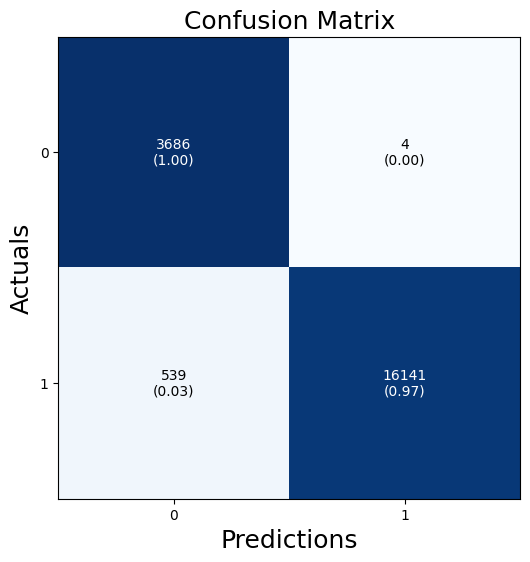


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3690
           1       1.00      0.97      0.98     16680

    accuracy                           0.97     20370
   macro avg       0.94      0.98      0.96     20370
weighted avg       0.98      0.97      0.97     20370



In [80]:
eval_metric(svm_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

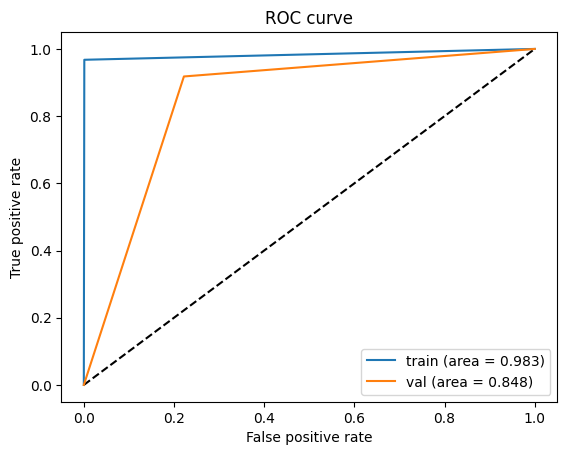

In [81]:
roc_auc_plot(svm_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [82]:
y_pred = svm_tf.predict(X_test_tf_idf)
decision_function= svm_tf.decision_function(X_test_tf_idf)

svc_tfidf_AP = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [83]:
rf = RandomForestClassifier(100, max_depth = 10, random_state = 42, n_jobs = -1,class_weight="balanced") # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [84]:
rf_scores = eval_scores(rf, X_train_count, y_train)
rf_scores.mean()[2:]

test_accuracy      0.839421
train_accuracy     0.871465
test_precision     0.539200
train_precision    0.599263
test_recall        0.795664
train_recall       0.878049
test_f1            0.642507
train_f1           0.712278
dtype: float64

	Test_Set



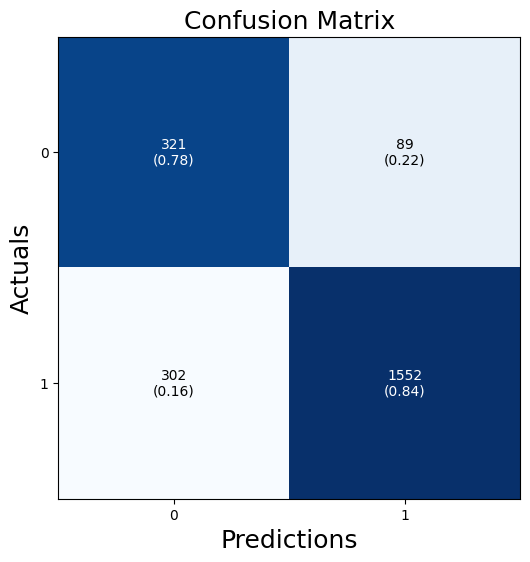

              precision    recall  f1-score   support

           0       0.52      0.78      0.62       410
           1       0.95      0.84      0.89      1854

    accuracy                           0.83      2264
   macro avg       0.73      0.81      0.75      2264
weighted avg       0.87      0.83      0.84      2264


	Train_Set



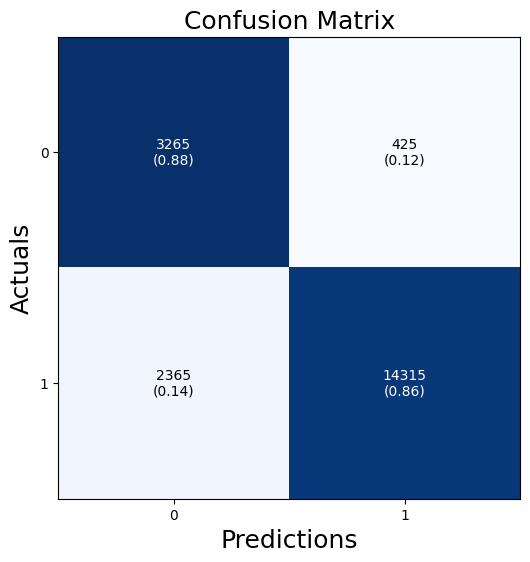


              precision    recall  f1-score   support

           0       0.58      0.88      0.70      3690
           1       0.97      0.86      0.91     16680

    accuracy                           0.86     20370
   macro avg       0.78      0.87      0.81     20370
weighted avg       0.90      0.86      0.87     20370



In [85]:
eval_metric(rf, X_train_count, y_train, X_test_count, y_test)

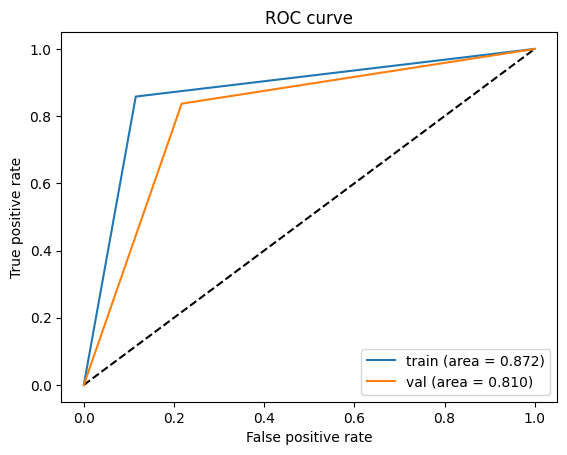

In [86]:
roc_auc_plot(rf,y_train, X_train_count, y_test, X_test_count)

In [87]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_count_AP = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [88]:
rf_tf = RandomForestClassifier(100,
                            max_depth = 10,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf_tf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [89]:
rf_scores_tf = eval_scores(rf_tf, X_train_tf_idf, y_train)
rf_scores_tf.mean()[2:]

test_accuracy      0.841041
train_accuracy     0.884561
test_precision     0.543666
train_precision    0.626807
test_recall        0.771545
train_recall       0.898306
test_f1            0.637568
train_f1           0.738272
dtype: float64

	Test_Set



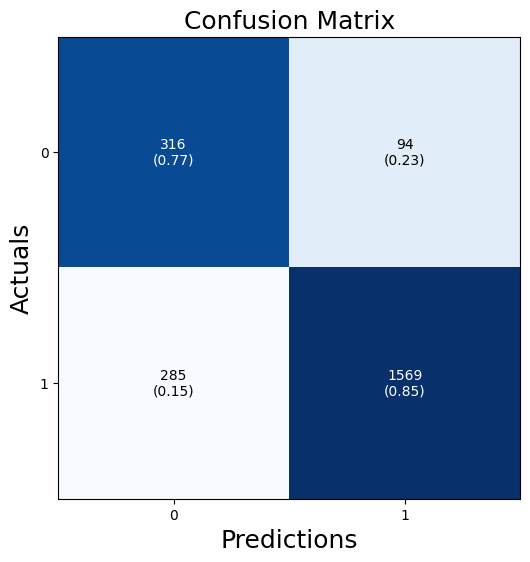

              precision    recall  f1-score   support

           0       0.53      0.77      0.63       410
           1       0.94      0.85      0.89      1854

    accuracy                           0.83      2264
   macro avg       0.73      0.81      0.76      2264
weighted avg       0.87      0.83      0.84      2264


	Train_Set



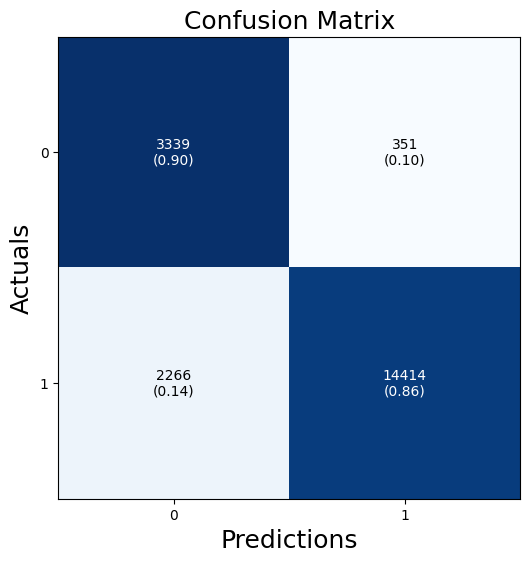


              precision    recall  f1-score   support

           0       0.60      0.90      0.72      3690
           1       0.98      0.86      0.92     16680

    accuracy                           0.87     20370
   macro avg       0.79      0.88      0.82     20370
weighted avg       0.91      0.87      0.88     20370



In [90]:
eval_metric(rf_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

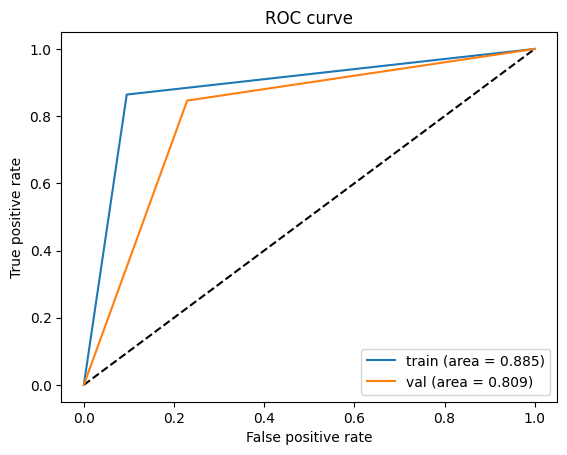

In [91]:
roc_auc_plot(rf_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [92]:
y_pred = rf_tf.predict(X_test_tf_idf)
y_pred_proba= rf_tf.predict_proba(X_test_tf_idf)[:,1]

rf_tfidf_AP = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [93]:
ada = AdaBoostClassifier(n_estimators= 100, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [94]:
ada_scores = eval_scores(ada, X_train_count, y_train)
ada_scores.mean()[2:]

test_accuracy      0.870152
train_accuracy     0.877037
test_precision     0.694199
train_precision    0.721470
test_recall        0.506775
train_recall       0.523171
test_f1            0.585754
train_f1           0.606499
dtype: float64

	Test_Set



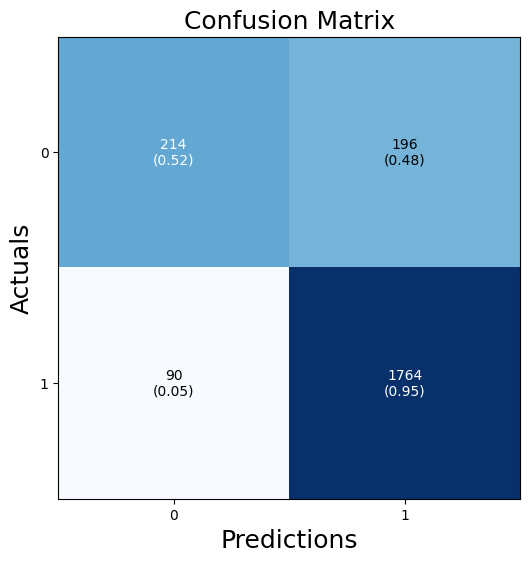

              precision    recall  f1-score   support

           0       0.70      0.52      0.60       410
           1       0.90      0.95      0.93      1854

    accuracy                           0.87      2264
   macro avg       0.80      0.74      0.76      2264
weighted avg       0.86      0.87      0.87      2264


	Train_Set



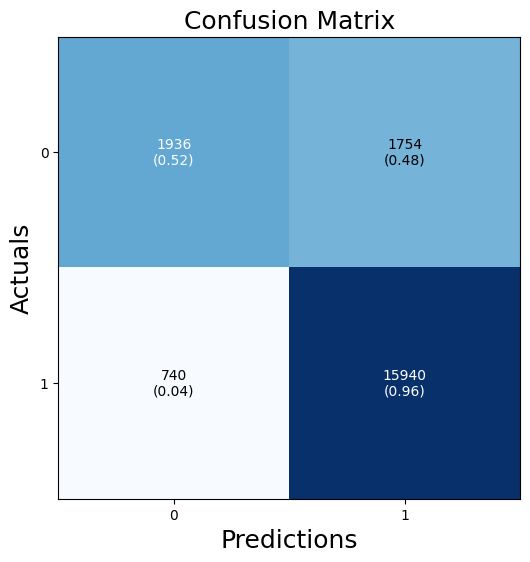


              precision    recall  f1-score   support

           0       0.72      0.52      0.61      3690
           1       0.90      0.96      0.93     16680

    accuracy                           0.88     20370
   macro avg       0.81      0.74      0.77     20370
weighted avg       0.87      0.88      0.87     20370



In [95]:
eval_metric(ada, X_train_count, y_train, X_test_count, y_test)

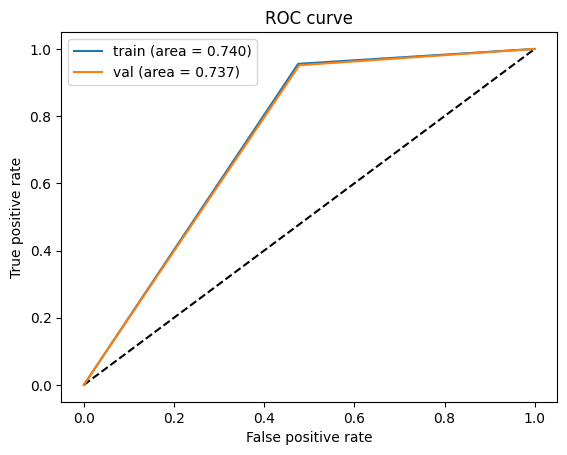

In [96]:
roc_auc_plot(ada,y_train, X_train_count, y_test, X_test_count)

In [97]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_count_AP = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [98]:
ada_tf = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42,
                         learning_rate=0.7)
ada_tf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [99]:
ada_scores_tf = eval_scores(rf_tf, X_train_tf_idf, y_train)
ada_scores_tf.mean()[2:]

test_accuracy      0.841041
train_accuracy     0.884561
test_precision     0.543666
train_precision    0.626807
test_recall        0.771545
train_recall       0.898306
test_f1            0.637568
train_f1           0.738272
dtype: float64

	Test_Set



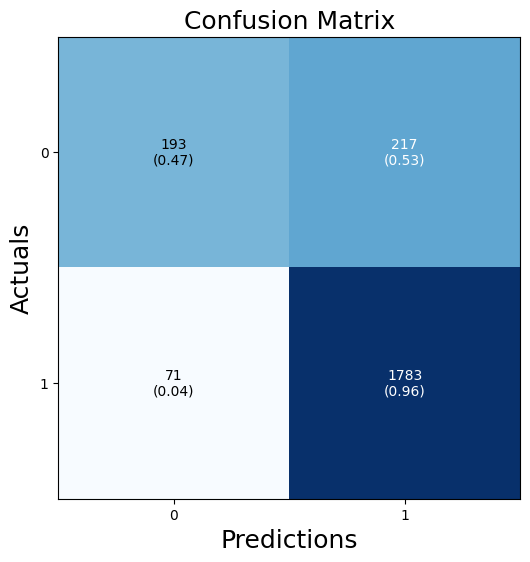

              precision    recall  f1-score   support

           0       0.73      0.47      0.57       410
           1       0.89      0.96      0.93      1854

    accuracy                           0.87      2264
   macro avg       0.81      0.72      0.75      2264
weighted avg       0.86      0.87      0.86      2264


	Train_Set



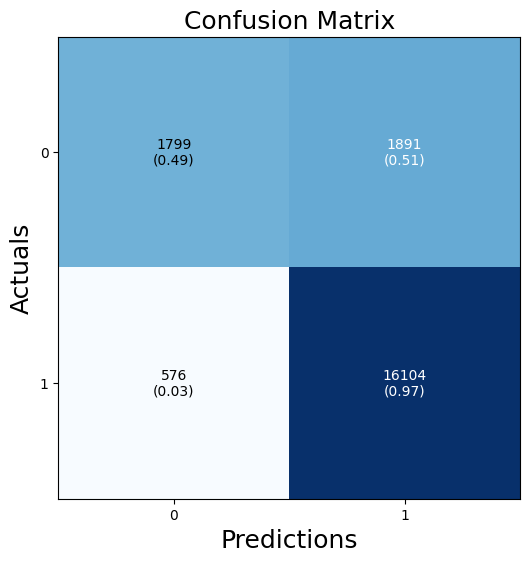


              precision    recall  f1-score   support

           0       0.76      0.49      0.59      3690
           1       0.89      0.97      0.93     16680

    accuracy                           0.88     20370
   macro avg       0.83      0.73      0.76     20370
weighted avg       0.87      0.88      0.87     20370



In [100]:
eval_metric(ada_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

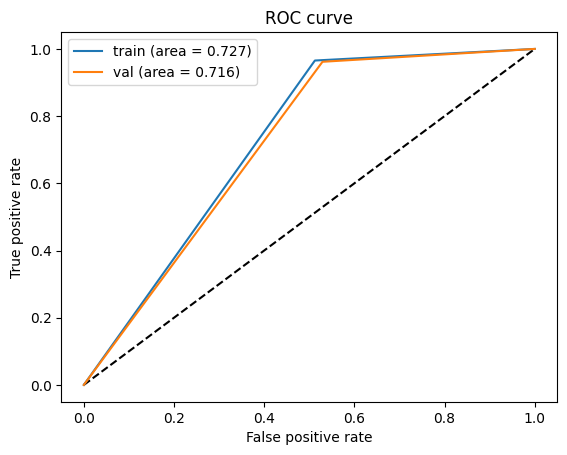

In [101]:
roc_auc_plot(ada_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [102]:
y_pred = ada_tf.predict(X_test_tf_idf)
y_pred_proba= ada_tf.predict_proba(X_test_tf_idf)[:,1]

ada_tfidf_AP = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [104]:
X

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: text, Length: 22634, dtype: object

### Tokenization

In [105]:
num_words = 10001

tokenizer = Tokenizer (num_words=num_words)


In [106]:
tokenizer.fit_on_texts(X)


### Creating word index

In [107]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [108]:
len(tokenizer.word_index)

#There are a total of 14847 unique tokens in our corpus.

14847

### Converting tokens to numeric

In [109]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [110]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

# Firstly, we assign the sizes of all the lines/documnets in the corpus to the variable num_tokens by putting them into a list.

# Since aggregation functions can be applied to arrays in a practical way, we convert the list to an array.

In [111]:
num_tokens

# We can see how many tokens each line/document consists of.

array([ 7, 62, 97, ..., 42, 85, 18])

In [112]:
num_tokens.mean()

# We are taking the average of all lines dimensions.

# Can we fix all comments to this number? Or should we choose another number?

60.39520190863303

In [113]:
num_tokens.max()
# We see that the longest line/document consisted of 35 tokens.

# We need to fix all rows/documents in our corpus to the same size. In fact, it is recommended to fix all documents to 35, which is the length of the longest
# document, to prevent information/token loss in the documents. However, This will come back to us as a computational cost. (Since the rows/documents are not
# too long in our data, you can fix all of them to the size of the longest comment. But what to do in data with very long lines will be shown below with
# an example.)

# If you have very powerful machines, of course, it is most sensible to fix all documents according to the size of the longest document.

# However, if our machines are not powerful, we need to fix rows/documents at smaller sizes. When deciding this, we can determine the number in such a way
# that there will be no information/token loss at rates of 95% and above (or, a token/information loss of 5% or less) in the documents in our corpus.

116

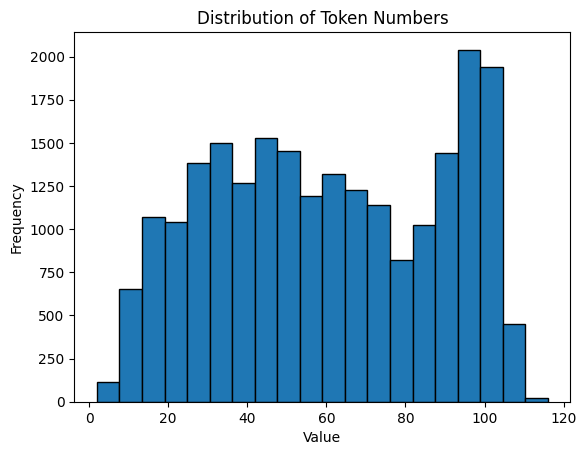

In [114]:
# Plot a histogram to visualize the distribution
plt.hist(num_tokens, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [115]:
max_tokens = 116

### Fixing token counts of all documents (pad_sequences)

In [116]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

In [117]:
X_pad.shape



(22634, 116)

In [118]:
np.argmax(num_tokens)

# The longest document in the corpus is located at the 16258th index.

16258

In [208]:
from tensorflow.keras.utils import to_categorical

y_new = to_categorical(y, 2)

In [209]:
y_new

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Train Set Split

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_new, test_size=0.1, stratify=y, random_state=42)


In [211]:

X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train,
                                                     test_size=0.1, stratify=y_train, random_state=42)

In [212]:
X_train.shape

(20370, 116)

In [213]:
y_train.shape

(20370, 2)

### Modeling

In [214]:
model = Sequential()
embedding_size = 50


In [215]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))


model.add(GRU(units=12, return_sequences=False))



model.add(Dense(2, activation='sigmoid'))

In [216]:
optimizer = Adam(learning_rate=0.008)

In [217]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [218]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 116, 50)           500050    
                                                                 
 dropout_6 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_9 (GRU)                 (None, 116, 50)           15300     
                                                                 
 gru_10 (GRU)                (None, 116, 25)           5775      
                                                                 
 dropout_7 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_11 (GRU)                (None, 12)                1404      
                                                                 
 dense_3 (Dense)             (None, 2)                

In [219]:
early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,
                           patience = 2, restore_best_weights=True)

In [220]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.37284642, 7.61849759])

In [221]:
model.fit(X_train, y_train, epochs=20, batch_size=32,
sample_weight= classes_weights,
validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/20
637/637 [==============================] - 201s 296ms/step - loss: 0.6512 - recall: 0.4030 - val_loss: 0.6902 - val_recall: 0.7202
Epoch 2/20
637/637 [==============================] - 183s 288ms/step - loss: 0.3988 - recall: 0.7260 - val_loss: 0.7840 - val_recall: 0.6402
Epoch 3/20
637/637 [==============================] - 182s 286ms/step - loss: 0.3253 - recall: 0.7914 - val_loss: 0.5615 - val_recall: 0.7860
Epoch 4/20
637/637 [==============================] - 183s 288ms/step - loss: 0.2720 - recall: 0.8328 - val_loss: 0.4476 - val_recall: 0.8336
Epoch 5/20
637/637 [==============================] - 182s 286ms/step - loss: 0.2434 - recall: 0.8418 - val_loss: 0.2932 - val_recall: 0.8817
Epoch 6/20
637/637 [==============================] - 180s 283ms/step - loss: 0.2163 - recall: 0.8648 - val_loss: 0.3740 - val_recall: 0.8542
Epoch 7/20
637/637 [==============================] - 183s 287ms/step - loss: 0.2236 - recall: 0.8563 - val_loss: 0.2559 - val_recall: 0.9048
Epoch 

### Model Evaluation

In [222]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.651164,0.402995,0.690175,0.720177
1,0.398820,0.726019,0.783964,0.640157
2,0.325283,0.791360,0.561501,0.785960
3,0.272001,0.832842,0.447600,0.833579
4,0.243359,0.841826,0.293209,0.881689


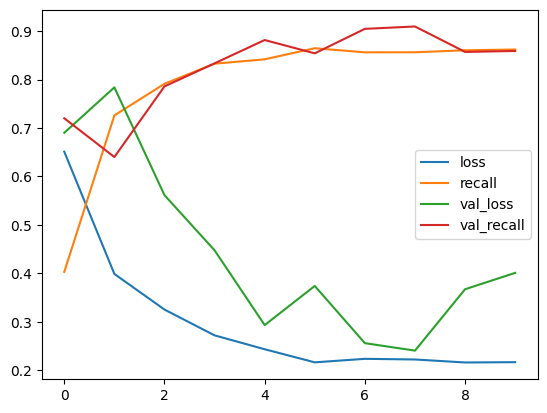

In [223]:
model_loss.plot();

In [189]:
model.evaluate(X_test,y_test)

71/71 [==============================] - 3s 44ms/step - loss: 0.4852 - recall: 0.8136


[0.4852037727832794, 0.8136042356491089]

In [190]:
model.evaluate(X_train, y_train)

637/637 [==============================] - 39s 61ms/step - loss: 0.3412 - recall: 0.8722


[0.3411647081375122, 0.8722140192985535]

In [224]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test) > 0.5


print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

71/71 [==============================] - 11s 111ms/step
[[ 341   69]
 [ 309 1545]]
              precision    recall  f1-score   support

           0       0.52      0.83      0.64       410
           1       0.96      0.83      0.89      1854

    accuracy                           0.83      2264
   macro avg       0.74      0.83      0.77      2264
weighted avg       0.88      0.83      0.85      2264



In [194]:
pip install scikit-plot

71/71 [==============================] - 5s 73ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


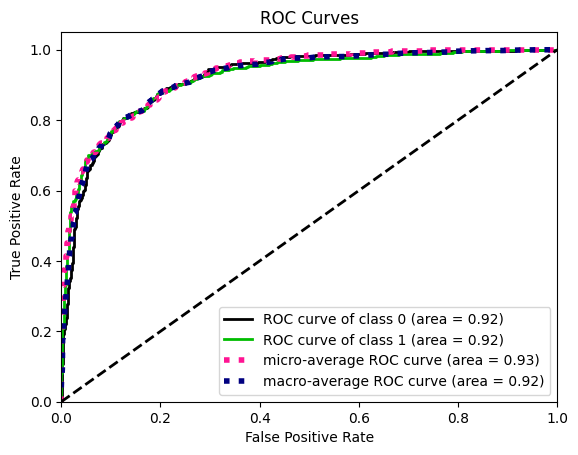

In [225]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test_new
y_probas = model.predict(X_test)
try:
  skplt.metrics.plot_roc_curve(y_true, y_probas)
except ValueError:
    pass
plt.show()

In [240]:
y_test.reshape(-1,1)

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [232]:
y_pred_proba.reshape(-1,1)

array([[0.51671792],
       [0.52846739],
       [0.60663403],
       ...,
       [0.5039322 ],
       [0.50363005],
       [0.50420828]])

In [236]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred,average='weighted')
DL_rec = recall_score(y_test, y_pred,average='weighted')

ValueError: ignored

## BERT Modeling

In [237]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.1 MB/s eta 0:00:00


### Read Data

In [238]:
X

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: text, Length: 22634, dtype: object

In [241]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  162


In [242]:
np.array(num_of_sent_tokens).mean()

76.75947689316956

### Train test split

In [243]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=42)

### Tokenization

In [248]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=76,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [249]:
np.array(all_sentence_tokens['input_ids'])

array([[  101,  7078,  6919, ...,     0,     0,     0],
       [  101,  2293,  2023, ..., 22265,  2006,   102],
       [  101,  1045,  2018, ...,  4906, 19957,   102],
       ...,
       [  101,  2023,  4906, ...,     0,     0,     0],
       [  101,  1045,  4149, ...,  2009,  1012,   102],
       [  101,  2023,  4377, ...,     0,     0,     0]])

In [250]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0]])

In [251]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

### Transformation Vectors to Matrices

In [252]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [253]:
Xids_train

array([[  101,  1996, 29507, ...,     0,     0,     0],
       [  101,  1045,  2572, ...,     0,     0,     0],
       [  101,  2023,  2003, ...,     0,     0,     0],
       ...,
       [  101,  1045,  2699, ...,     0,     0,     0],
       [  101,  2122,  6471, ...,     0,     0,     0],
       [  101,  2023,  4377, ...,     0,     0,     0]])

In [254]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)


Xids_train.shape  : (20370, 162)
Xmask_train.shape : (20370, 162)
Xids_test.shape   : (2264, 162)
Xmask_test.shape  : (2264, 162)


In [255]:
labels_train = y_train2.values.reshape(-1,1)
labels_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [256]:
labels_test = y_test2.values.reshape(-1,1)
labels_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

### Transformation Matrix to Tensorflow tensor

In [257]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [258]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [259]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [260]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [261]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [262]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [263]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


In [264]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 675.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.8 MB/s eta 0:00:00


In [265]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [266]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1274
127


### Creating Model with TPU

the code couldn't be executed for this part.  

### Compare Models F1 Scores, Recall Scores and Average Precision Score

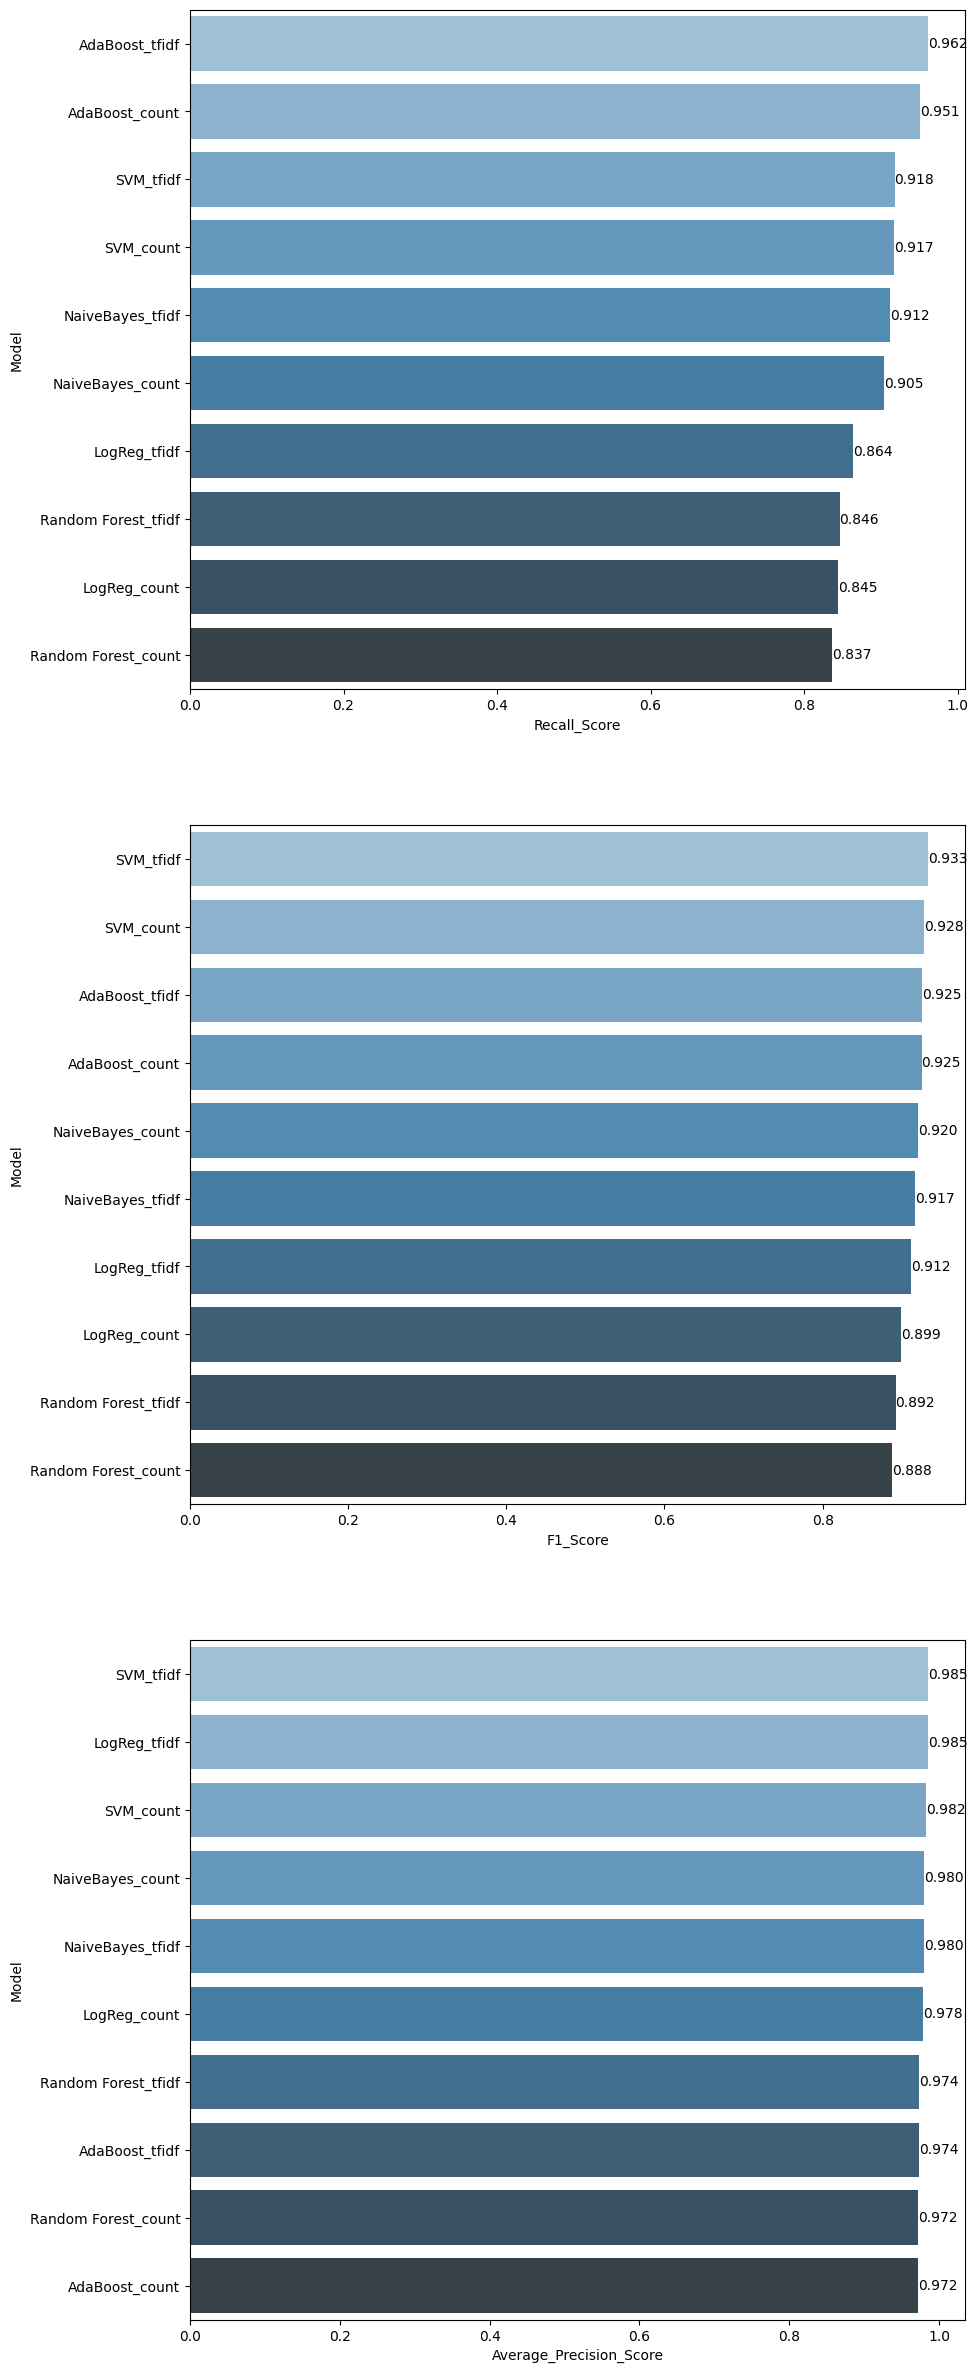

In [268]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],

                        "F1_Score": [nb_count_f1, logisitc_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     logisitc_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1],

                        "Recall_Score": [nb_count_rec, logisitc_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         logisitc_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec],

                        "Average_Precision_Score": [nb_count_AP, logisitc_count_AP, svc_count_AP, rf_count_AP, ada_count_AP, nb_tfidf_AP,
                                                    logisitc_tfidf_AP, svc_tfidf_AP, rf_tfidf_AP, ada_tfidf_AP]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

all models scores was good overall some of them was slightly overfit


best model is ada_tfidf with 0.96 Recall and 0.97 Percision 0.92 F1 score ⭐

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___